## Multiple Linear Regression

### Multiple regression is to learn more about the relationship between several independent variables and a dependent variable.

<img src='images/multiple_reg.PNG' />

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### importing dataset

In [3]:
data = pd.read_csv('dataset/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### Encoding categorical data

In [4]:
data_new = data.iloc[:,:-1]

In [5]:
data_new.head()

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [9]:
col=data_new.columns
c=list(col)
c

['R&D Spend', 'Administration', 'Marketing Spend', 'State']

In [10]:
data2 = pd.get_dummies(data_new[c])
#label encoding-
0
1
2
0
1
2
#one hot encoding


In [7]:
data2.head()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,0,0,1
1,162597.70,151377.59,443898.53,1,0,0
2,153441.51,101145.55,407934.54,0,1,0
3,144372.41,118671.85,383199.62,0,0,1
4,142107.34,91391.77,366168.42,0,1,0


In [24]:
data2.describe()

,R&D Spend,Administration,Marketing Spend,State_California,State_Florida,State_New York
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,0.340000,0.320000,0.340000
std,45902.256482,28017.802755,122290.310726,0.478518,0.471212,0.478518
min,0.000000,51283.140000,0.000000,0.000000,0.000000,0.000000
25%,39936.370000,103730.875000,129300.132500,0.000000,0.000000,0.000000
50%,73051.080000,122699.795000,212716.240000,0.000000,0.000000,0.000000
75%,101602.800000,144842.180000,299469.085000,1.000000,1.000000,1.000000
max,165349.200000,182645.560000,471784.100000,1.000000,1.000000,1.000000


In [11]:
data2.shape

(50, 6)

### Split dataset

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X=data2.iloc[:,:].values
type(X)

numpy.ndarray

In [14]:
y=data.iloc[:,4].values

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=5,random_state=0)

In [16]:
X_train.shape

(45L, 6L)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [18]:
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [19]:
y_pred = reg.predict(X_test)

In [20]:
y_test

array([ 103282.38,  144259.4 ,  146121.95,   77798.83,  191050.39])

In [21]:
y_pred

array([ 101475.55240111,  133287.417583  ,  132546.1614474 ,
         72702.7136192 ,  178346.51727008])

In [22]:
from sklearn.metrics import r2_score

In [23]:
r2_score(y_test,y_pred)

0.93480943710609976

In [25]:
import seaborn as sb

In [22]:
data_new['Profit']=data['Profit']

In [23]:
%matplotlib inline

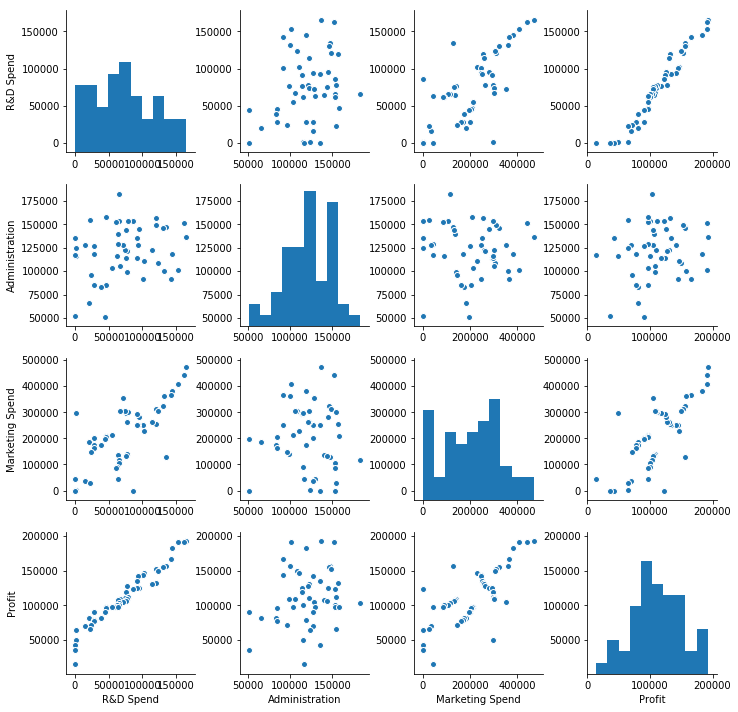

In [24]:
sb.pairplot(data_new)


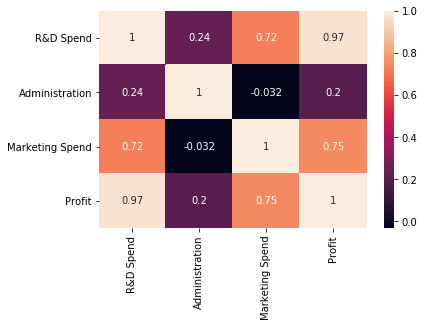

In [25]:
sb.heatmap(data_new.corr(),annot=True)

In [26]:
data_new.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [27]:
data_new.iloc[:,[0,4]].head()

,R&D Spend,Profit
0,165349.20,192261.83
1,162597.70,191792.06
2,153441.51,191050.39
3,144372.41,182901.99
4,142107.34,166187.94


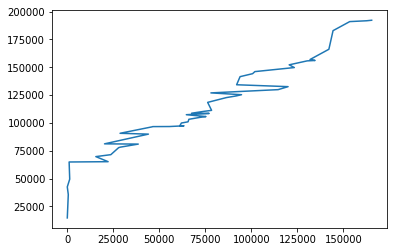

In [28]:
plt.plot(data_new['R&D Spend'].values,data_new['Profit'].values)

In [29]:
X_test[0]

array([  6.60515200e+04,   1.82645560e+05,   1.18148200e+05,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00])

In [31]:
reg.coef_

array([  7.78395354e-01,   5.70695437e-03,   3.21344322e-02,
         1.24850276e+02,  -1.02835632e+03,   9.03506043e+02])

In [32]:
reg.intercept_

46250.737220733557

In [33]:
t=X_test[0]

In [34]:
t

array([  6.60515200e+04,   1.82645560e+05,   1.18148200e+05,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00])

In [ ]:
reg.intercept_+t[0]*reg.coef_[0]